# Passenger Analysis (Ride-sharing)

You work as an analyst for Zuber, a new ride-sharing company launched in Chicago. Your task is to find patterns in the available information. You want to understand passenger preferences and the impact of external factors on the trip.

Using the database, you will analyze data from competitors and test hypotheses regarding the effect of weather on trip frequency.

<b>Objective:</b>

   1. Passenger preferences and the impact of external factors on trips
   
<b>Hypothesis:</b>
   1. The average journey duration from the Loop to O'Hare International Airport changes on rainy Saturdays

<b>Stages:</b><a id='back'></a>

1. [Data Overview](#Start)
    - [First dataset](#first)
    - [Second dataset](#second)
    - [Third dataset](#third)
2. [Data Pre-processing](#Pre-processing)
3. [*Exploratory Data Analysis*](#EDA)
    - [Company ranking based on number of deliveries](#1)
    - [Ranking of destinations based on average trips](#2)
4. [Hypothesis Test](#Test)
    - [Average trip duration from Loop to O'Hare International Airport](#h1)
5. [General Conclusion](#Conclusion)

## Data Overview <a id="Start"></a>

In [1]:
# Load all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

### First dataset <a id="first"></a>

In [2]:
# Load datasets
company_df = pd.read_csv('Y:\\Online Course\\Practicum\\Jupyter Notebook\\6 Project\\project_sql_result_01.csv')

In [3]:
# Examining dataset information
company_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [4]:
# Dataset size
company_df.shape

(64, 2)

In [5]:
# Sample data
company_df.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


Documentation:
- `company_name` - the name of the taxi company
- `trips_amount` - number of trips for each taxi company on 15-16 November 2017.

In [6]:
# Checking for duplicates
company_df.duplicated().sum()

0

After loading, and checking the dataset above, all looks good and needs no repairs.

[Back to stages](#back)

### Second dataset <a id="second"></a>

In [7]:
# Load datasets
location_df = pd.read_csv('Y:\\Online Course\\Practicum\\Jupyter Notebook\\6 Project\\project_sql_result_04.csv')

In [8]:
# Check dataset info
location_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [9]:
# Dataset size
location_df.shape

(94, 2)

In [10]:
# Sample data
location_df.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


Documentation:
- `dropoff_location_name` - the name of the Chicago area where the trip ends
- `average_trips` - the average number of trips ending in each region in November 2017.

In [11]:
# Checking for duplicates
location_df.duplicated().sum()

0

The second dataset also appears to have nothing to fix.

[Back to stages](#back)

### Third dataset <a id="third"></a>

In [12]:
# Load datasets
weather_df = pd.read_csv('Y:\\Online Course\\Practicum\\Jupyter Notebook\\6 Project\\project_sql_result_07.csv')

In [13]:
# Check dataset info
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [14]:
# Dataset size
weather_df.shape

(1068, 3)

In [15]:
# Sample data
weather_df.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


*This file* contains travel data from Loop to O'Hare International Airport.

Documentation:
- `start_ts` - pick-up date and time
- `weather_conditions` - weather conditions when the trip started
- `duration_seconds` - trip duration in seconds

In [16]:
# Checking for duplicates
weather_df.duplicated().sum()

197

**Tentative conclusion**
1. Changing the data type of column `start_ts`- the third dataset,
2. There is a duplication that needs to be corrected - the third dataset.

[Back to stages](#back)

## Data Pre-processing <a id="Pre-processing"></a>

In [17]:
# Fixed duplicates
weather_df = weather_df.drop_duplicates().reset_index(drop=True)

In [18]:
# Checking the result
weather_df.duplicated().sum()

0

In [19]:
# Change the data type of the `start_ts` column
weather_df['start_ts'] = pd.to_datetime(weather_df['start_ts'])

In [20]:
# Checking the result
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871 entries, 0 to 870
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            871 non-null    datetime64[ns]
 1   weather_conditions  871 non-null    object        
 2   duration_seconds    871 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 20.5+ KB


As can be seen the dataset is fixed.

[Back to stages](#back)

## *Exploratory Data Analysis* <a id="EDA"></a>

### Company ranking based on number of deliveries <a id="1"></a>

In [21]:
# Data filters
top_ten_company = company_df.sort_values(by='trips_amount', ascending = False).head(10)

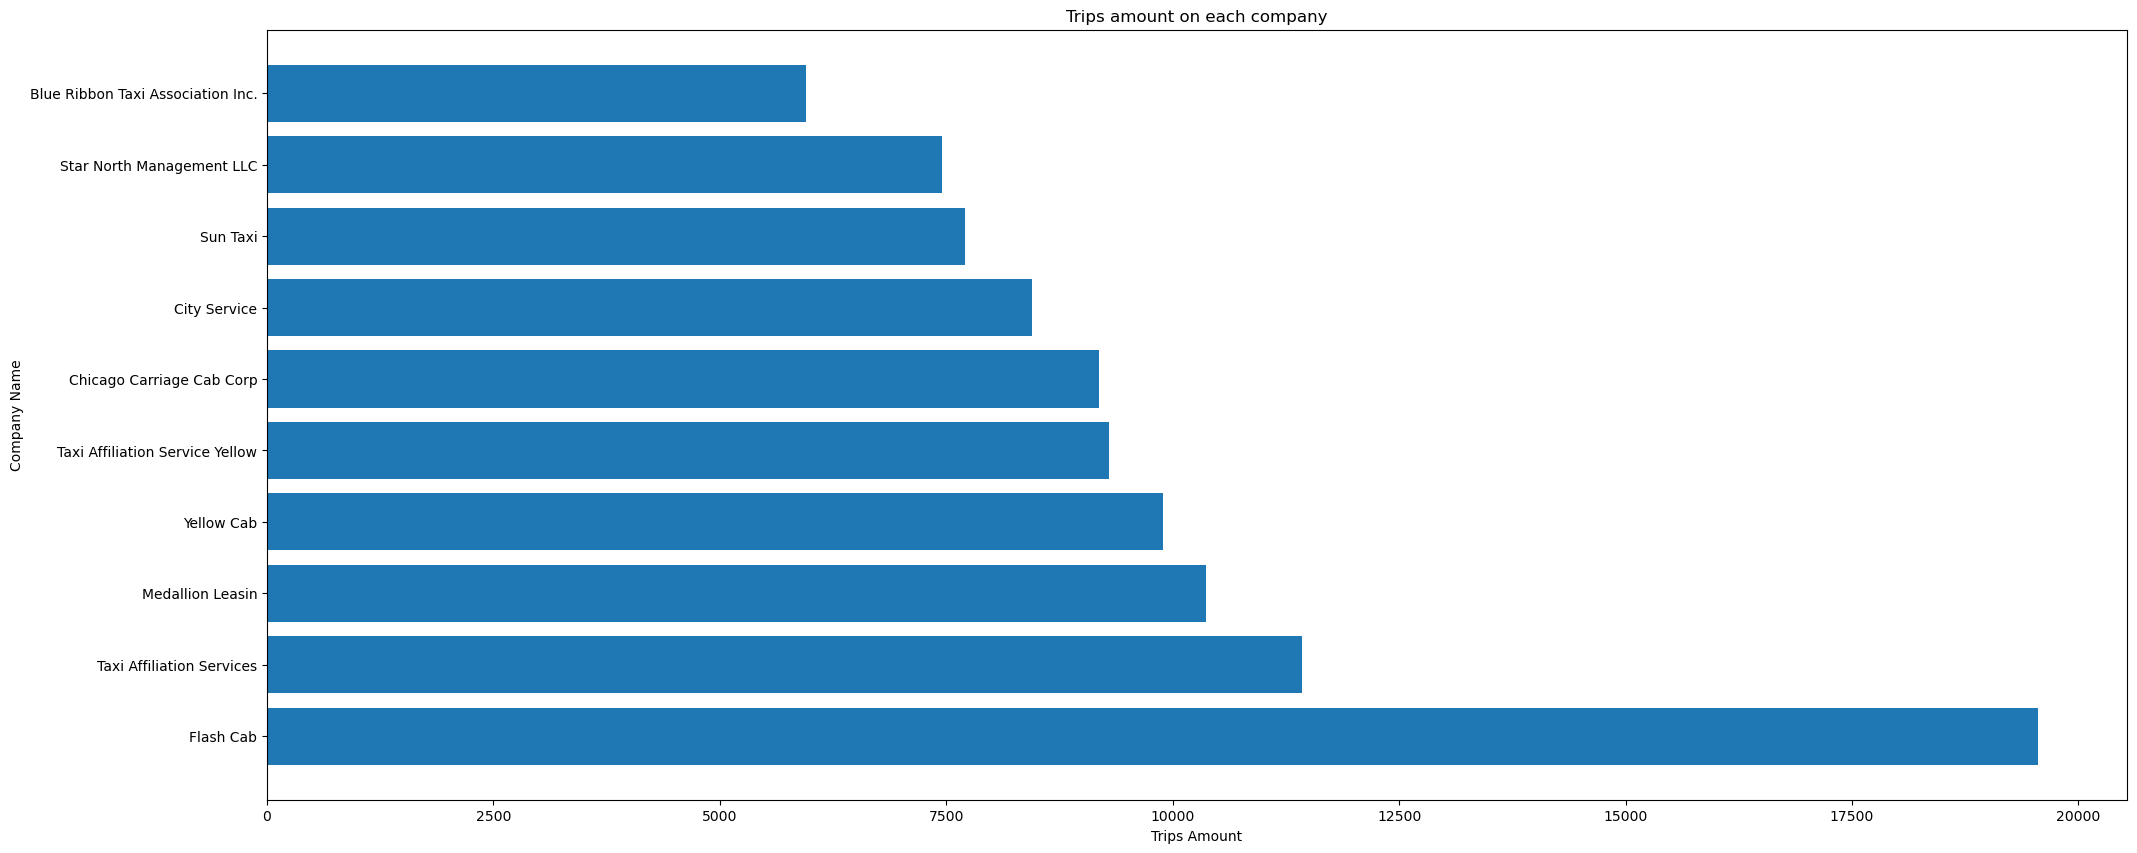

In [22]:
# Horizontal bars
plt.figure(figsize=(24, 10))
plt.barh(y=top_ten_company.company_name, width=top_ten_company.trips_amount)

# Title
plt.title("Trips amount on each company")
 
# Naming x,y-axis
plt.xlabel('Trips Amount')
plt.ylabel('Company Name')
 
# Displays the result
plt.show()

Flash Cab is the company with the most delivery points, Taxi Affiliation Services, and Medallion Leasing are in the next place but they can't be compared to Flash Cab, maybe there are several reasons that make Flash Cab the highest rated.

[Back to stages](#back)

### Ranking of destinations based on average trips<a id="2"></a>

In [23]:
# Data filters
top_ten_location = location_df.sort_values(by='average_trips', ascending = False).head(10)

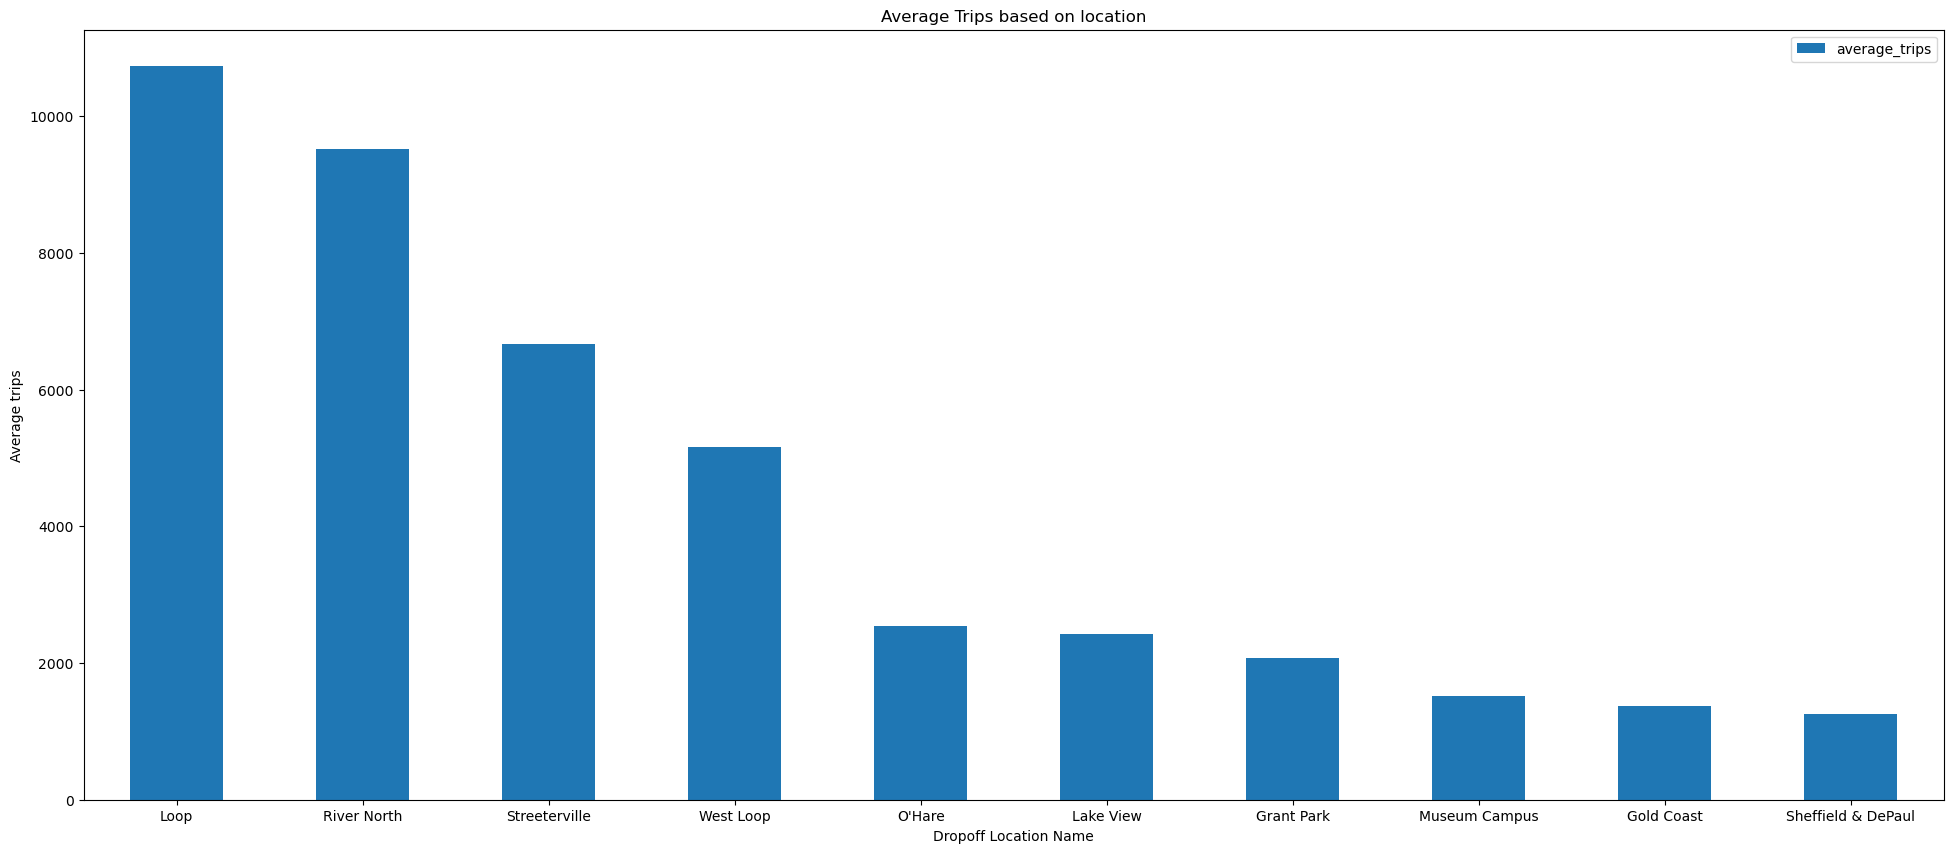

In [24]:
# Visualize filtered data
top_ten_location.plot(x='dropoff_location_name', y='average_trips', kind='bar', rot=0, figsize=(24, 10))

# Title
plt.title("Average Trips based on location")

# Naming x,y-axis
plt.xlabel('Dropoff Location Name')
plt.ylabel('Average trips')

# Displays the result
plt.show()

The Loop was the most visited location, followed by River North at number two next for Streeterville. But this time the difference is not too significant from one place to another.

[Back to stages](#back)

## Hypothesis Test <a id="Test"></a>

The hypothesis test this time will use a t-test where the sample is to test the difference between the two variables.

there are several types of T-test, such as *one sample t-test, independent sample t-test, and paired sample t-test*, and for now the one that will be used is *Independent sample t-test* because the samples to be tested have differences.

The T-test itself has a value *p-value* or the probability of occurrence of the value and also *alpha* or the error limit used.

So, if the p-value is less than alpha, then we can conclude that the evidence is strong enough to reject the null hypothesis (H0) and accept the alternative hypothesis (H1). Meanwhile, if the p-value is greater than alpha, then we fail to reject the null hypothesis (H0) and cannot draw any conclusions about the alternative hypothesis (H1).

### Average trip duration from Loop to O'Hare International Airport <a id="h1"></a>

Before starting hypothesis testing, the null hypothesis (H0) and the alternative hypothesis (H1) must be determined first.

1. H0 : The average trip duration from the Loop to O'Hare International Airport on rainy Saturdays has not changed.
2. H1 : The average trip duration from the Loop to O'Hare International Airport on rainy Saturdays changes.

If H0 defines the average trip duration from the Loop to O'Hare International Airport on rainy Saturdays 'not changed', then H1 will define the opposite of H0 The average trip duration from the Loop to O'Hare International Airport on rainy Saturdays 'changes'.

For now the alpha used is 5%, why not 1%, or 10%?, Because 5% is a balanced number to avoid type-I errors, or type-II errors.

Type-I error supports the alternative hypothesis (H1) when the null hypothesis (H0) is true, while type-II error does not support the null hypothesis (H0) when the alternative hypothesis (H1) is true.

In [25]:
# Data filters
good_weather = weather_df.loc[weather_df['weather_conditions']=='Good']
bad_weather = weather_df.loc[weather_df['weather_conditions']=='Bad']

In [26]:
# Check variance
print('Varian of population good_weather:', np.var(good_weather['duration_seconds']))
print('Varian of population abd_weather:', np.var(bad_weather['duration_seconds']))

Varian of population good_weather: 597389.5417434272
Varian of population abd_weather: 561003.0958729


In [27]:
# Alpha is set at 0.05
alpha = 0.05

# T-test
results = st.ttest_ind(good_weather['duration_seconds'], bad_weather['duration_seconds'], equal_var=False)

# Displays the result
print('p-value:', results.pvalue)

# Displays results based on conditions
if results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print('We cannot ignore the null hypothesis') 

p-value: 9.126383933880083e-08
We reject the null hypothesis


As explained above, because the p-value is smaller than alpha, the null hypothesis is rejected, which means that the average trip duration from the Loop to O'Hare International Airport on rainy Saturdays is changing.

[Back to stages](#back)

## General Conclusion <a id="Conclusion"></a>

General conclusions that can be drawn:

1. At the beginning the dataset has been checked and there are a number of things that need to be fixed, especially in the third dataset such as duplicating data, and changing the data type in each column that needs to be changed.

2. When doing *exploratory data analysis* there are several questions that have been analyzed:
    - Company ranking based on the number of deliveries, Flash Cab dominates and makes it far ahead of several companies
    - Ranking of destination locations based on average trips, Loop, River North and Streeterville being the top three destination locations, there is no significant difference between location destinations.
    
3. For the hypothesis:
    - The average duration of the trip from the Loop to O'Hare International Airport changes on rainy Saturdays, because the p-value is smaller than alpha, the null hypothesis is rejected.

[Back to stages](#back)